# Features 2 : Path length and player persistence

## Importing libraries 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
import sys

## Loading the data

In [5]:
DATA_FOLDER = "../data/"
PATHS_AND_GRAPH = DATA_FOLDER + "wikispeedia_paths-and-graph/"
PATHS_FINISHED = PATHS_AND_GRAPH + "paths_finished.tsv"
PATHS_UNFINISHED = PATHS_AND_GRAPH + "paths_unfinished.tsv"

In [6]:
# loading finished paths
paths_finished = pd.read_csv(
    PATHS_FINISHED,
    sep="\t",
    header=None,
    names=["hashedIpAddress", "timestamp", "durationInSec", "path", "rating"],
    encoding="utf-8",
    skiprows=16,
).copy(deep=True)
paths_finished["timestamp"] = pd.to_datetime(paths_finished["timestamp"], unit="s")
paths_finished.head()

,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,2011-02-15 03:26:49,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,3824310e536af032,2012-08-12 06:36:52,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,415612e93584d30e,2012-10-03 21:10:40,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,64dd5cd342e3780c,2010-02-08 07:25:25,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,015245d773376aab,2013-04-23 15:27:08,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0


In [8]:
# loading unfinished paths
paths_unfinished = pd.read_csv(
    PATHS_UNFINISHED,
    sep="\t",
    header=None,
    names=["hashedIpAddress", "timestamp", "durationInSec", "path", "target", "type"],
    encoding="utf-8",
    skiprows=17,
).copy(deep=True)
paths_unfinished["timestamp"] = pd.to_datetime(paths_unfinished["timestamp"], unit="s")
paths_unfinished.head()

,hashedIpAddress,timestamp,durationInSec,path,target,type
0,2426091a53125110,2011-02-07 05:02:15,1804,Obi-Wan_Kenobi,Microsoft,timeout
1,26141fd878806294,2011-02-07 05:14:11,1805,Julius_Caesar,Caracas,timeout
2,2b015fb8181c48f2,2011-02-07 15:00:19,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout
3,53a53bc244e08a6a,2011-02-07 16:06:01,49,Paraguay,Mount_St._Helens,restart
4,53a53bc244e08a6a,2011-02-07 17:18:25,1808,Paraguay;Bolivia,Mount_St._Helens,timeout


## Loading additional datasets needed for path length feature

In [9]:
# Loading shortest path distance matrix
SHORTEST_PATH_MATRIX = PATHS_AND_GRAPH + "shortest-path-distance-matrix.txt"
shortest_path_distance_matrix = pd.read_csv(
    SHORTEST_PATH_MATRIX,
    sep="\t",
    names=["shortest path"],
    header=None,
    encoding="utf-8",
    skiprows=17,
).copy(deep=True)
shortest_path_distance_matrix = shortest_path_distance_matrix["shortest path"].apply(
    lambda x: list(x)
)  # splitting string into list
display(shortest_path_distance_matrix.head())

0    [0, _, _, _, _, _, 3, 3, 3, 3, 3, 3, 2, 5, 6, ...
1    [_, 0, _, _, _, _, 2, 2, 2, 2, 2, 3, 2, 5, 6, ...
2    [_, _, 0, _, _, _, 3, 3, 2, 2, 2, 4, 2, 5, 6, ...
3    [_, _, _, 0, _, _, 3, 3, 3, 3, 3, 3, 2, 5, 6, ...
4    [_, _, _, _, 0, _, 2, 2, 3, 2, 3, 3, 3, 5, 6, ...
Name: shortest path, dtype: object

In [10]:
# loading articles dataset
ARTICLES = PATHS_AND_GRAPH + "articles.tsv"
articles = pd.read_csv(
    ARTICLES,
    sep="\t",
    header=None,
    encoding="utf-8",
    names=["article name"],
    skiprows=12,
).copy(deep=True)
display(articles.head())

,article name
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in
1,%C3%85land
2,%C3%89douard_Manet
3,%C3%89ire
4,%C3%93engus_I_of_the_Picts


# Feature 2: Path length and player persistence
Are longer paths more challenging? Do they lead to giving up? \
Let's look at path length, ratings and giving up rate.
Are longer paths more challenging? Do they lead to giving up? \
Let's look at path length, ratings and giving up rate.

1) Removing mistakes from target column...
2) Removing back clicks and splitting paths...
100%|██████████████████████████████████████████████████████████████████████████| 51318/51318 [00:49<00:00, 1040.64it/s]
3) Computing optimal finished path length...
100%|███████████████████████████████████████████████████████████████████████████| 51318/51318 [00:59<00:00, 867.12it/s]
Mean optimal path length for finished games: 2.85
4) Computing optimal unfinished path length...
100%|███████████████████████████████████████████████████████████████████████████| 24846/24846 [00:27<00:00, 918.55it/s]
Mean optimal path length for unfinished games: 3.23
A longer optimal path length might cause more restarts and timouts, this is a metric we can further explore!
5) Plotting rating and finished path length...


C:\Users\mathi\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mathi\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mathi\anaconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


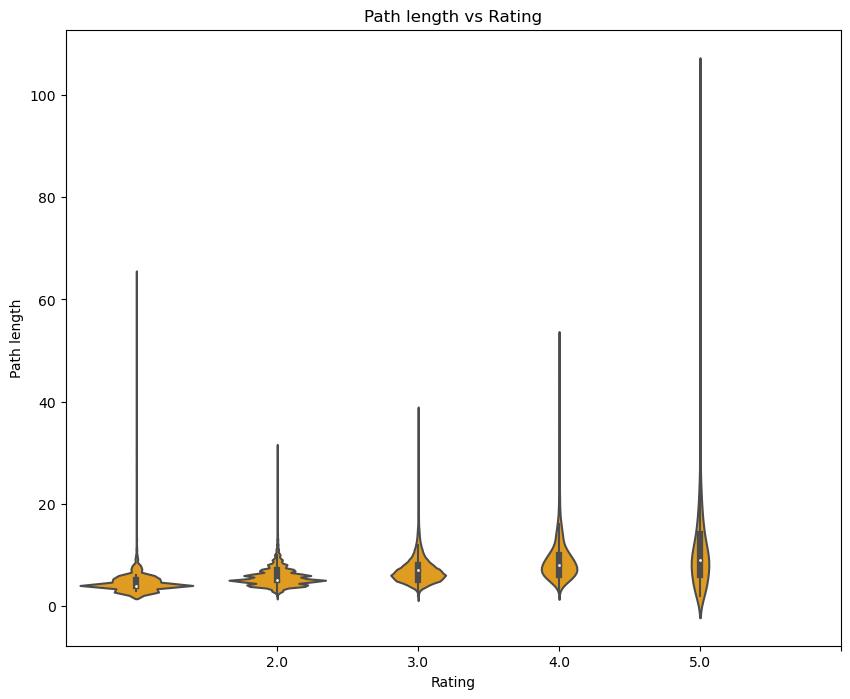

In [25]:
# runtime = ~2min30sec

paths_finished_copy = paths_finished.copy(deep=True)
paths_unfinished_copy = paths_unfinished.copy(deep=True)
pd.options.mode.chained_assignment = None  # to remove warning

# Delete datapoints from 'paths_unfinished_copy' if 'target' isn't part of article list from 'articles' dataframe
print("1) Removing mistakes from target column...")
paths_unfinished_copy = paths_unfinished_copy[
    paths_unfinished_copy["target"].isin(articles["article name"])
]

# Removing back clicks (<) and splitting paths
print("2) Removing back clicks and splitting paths...")
for i in tqdm(range(len(paths_finished_copy)), file=sys.stdout):
    paths_finished_copy["path"].iloc[i] = paths_finished_copy["path"].iloc[i].split(";")
    for item in paths_finished_copy["path"].iloc[i].copy():
        if item == "<":
            paths_finished_copy["path"].iloc[i].remove(item)


## Comparing optimal path length between finished and unfinished


# function computing optimal path length
def mean_optimal_path_length(paths, finished, shortest_path_distance_matrix):
    mean = np.zeros((len(paths), 1))
    for i in tqdm(range(len(mean)), file=sys.stdout):
        if finished == True:
            start_article = paths["path"][i][0]
            end_article = paths["path"][i][-1]
        else:
            start_article = paths["path"].iloc[i].split(";")[0]
            end_article = paths["target"].iloc[i]
        start_index = articles[articles["article name"] == start_article].index[0]
        end_index = articles[articles["article name"] == end_article].index[0]
        if shortest_path_distance_matrix[start_index][end_index] == "_":
            mean[i] = -1  # removes 'long peper' error !!!
        else:
            mean[i] = shortest_path_distance_matrix[start_index][end_index]
    return mean.mean()


print("3) Computing optimal finished path length...")
mean_finished_optimal_path_length = mean_optimal_path_length(
    paths_finished_copy, True, shortest_path_distance_matrix
)  # change to only take unique path datapoints !!!
print(
    "Mean optimal path length for finished games:",
    "%.2f" % mean_finished_optimal_path_length,
)

print("4) Computing optimal unfinished path length...")
mean_unfinished_optimal_path_length = mean_optimal_path_length(
    paths_unfinished_copy, False, shortest_path_distance_matrix
)
print(
    "Mean optimal path length for unfinished games:",
    "%.2f" % mean_unfinished_optimal_path_length,
)
print(
    "A longer optimal path length might cause more restarts and timouts, this is a metric we can further explore!"
)

# Exploring possible correlation between rating and finished path length
print("5) Plotting rating and finished path length...")
paths_finished_copy_woNan = paths_finished_copy.dropna(
    subset=["rating"]
)  # Remove nans from the 'rating' columns
paths_finished_copy_woNan = paths_finished_copy_woNan[
    paths_finished_copy_woNan["path"].apply(lambda x: len(x) <= 200)
]  # Remove aberrant path length value


fig, ax = plt.subplots(figsize=(10,8))
sns.violinplot(x=paths_finished_copy_woNan['rating'], 
               y=paths_finished_copy_woNan['path'].apply(lambda x: len(x)),
               ax=ax, color = 'orange')

ax.set_ylabel('Path length')
ax.set_xlabel('Rating')
ax.set_xticks(ticks=[1,2,3,4,5])
plt.title('Path length vs Rating')
plt.show()

There seems to be a positive correlation between path length and rating. \
This is a feature we can potentially use after further testing and investigation.\
The mean optimal path length for finished and unfinished games is also a feature we can further investigate, test, and combine to other features!

## 